# **Analysis**

(For code descriptions only -- not intended to be run.)

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

## Dataframe Creation

In [ ]:
df = pd.read_csv("../data/processed/integrated.csv")

## Missing Values Check

In [20]:
## explicit missing values check
if (df.isna().sum() > 0).any():
    print('Explicit missing values present.')
else:
    print('No explicit missing values present.')

No explicit missing values present.


In [21]:
## implicit missing values check
if ((col == 'int64') or (col =='float64') for col in df.dtypes):
    print('No implicit missing values present.')
else:
    print('Implicit missing values present')

No implicit missing values present.


## Correlation Heatmap

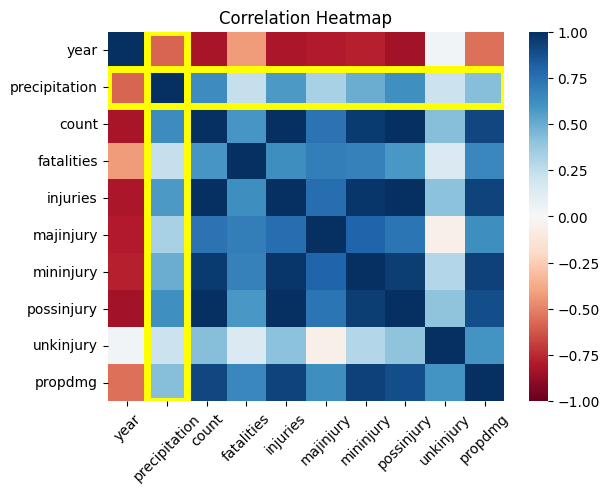

In [5]:
corr = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, ax=ax, vmin=-1, vmax=1, cmap='RdBu')
rect1 = patches.Rectangle((1, 0), width=1, height=corr.shape[0], fill=False, edgecolor="yellow", linewidth=5)
rect2 = patches.Rectangle((0, 1), width=corr.shape[1], height=1, fill=False, edgecolor="yellow", linewidth=5)
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.savefig("../results/heatmap.png", bbox_inches='tight')

## Precipitation Pairplot

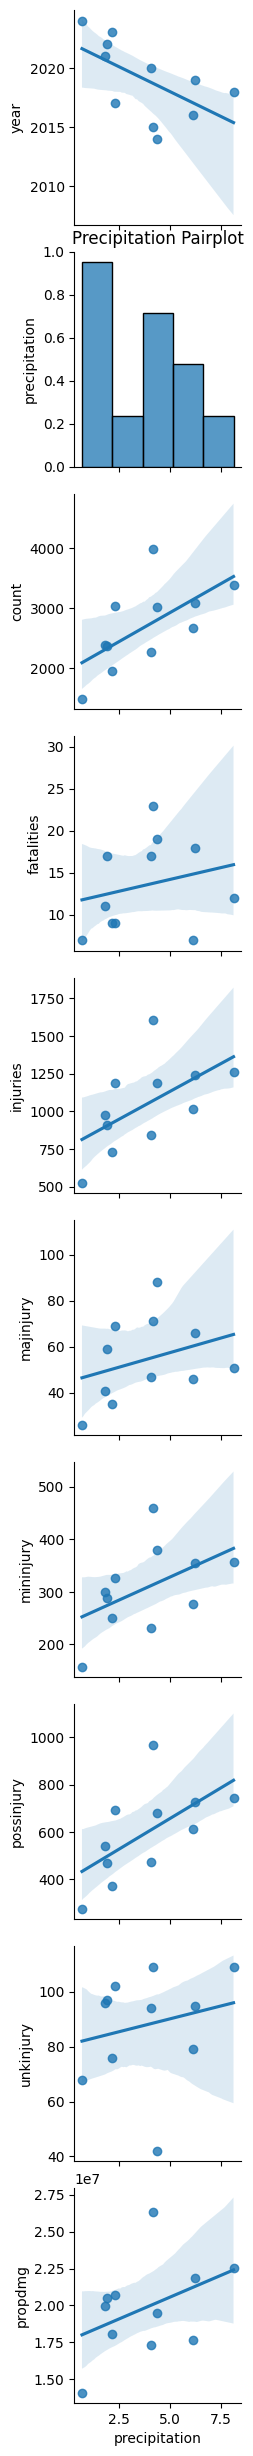

In [7]:
sns.pairplot(x_vars=["precipitation"], y_vars=df.columns, data=df, kind='reg')
plt.title("Precipitation Pairplot")
plt.savefig("../results/pairplot.png", bbox_inches='tight')

## Precipitation and Count lmplot

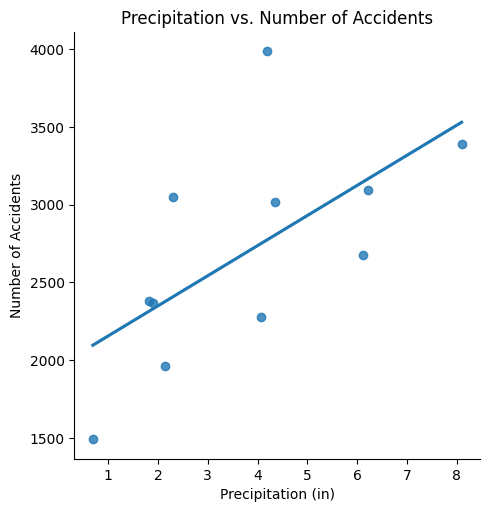

In [8]:
sns.lmplot(x='precipitation',y='count',data=df, ci=False)
plt.xlabel("Precipitation (in)")
plt.ylabel("Number of Accidents")
plt.title("Precipitation vs. Number of Accidents")
plt.savefig("../results/lmplot.png", bbox_inches='tight')

## Count and Precipitation Dual Lineplot

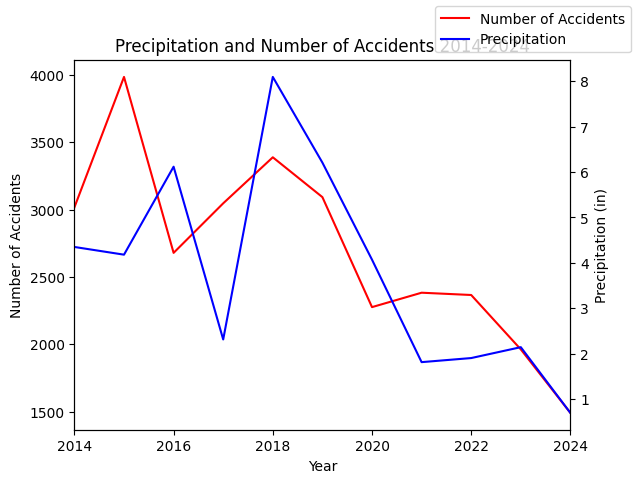

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(df['year'], df['count'], label="Number of Accidents", color='red')
ax1.set_xlabel("Year")
plt.xlim(2014, 2024)
ax1.set_ylabel("Number of Accidents")
ax1.set_title("Precipitation and Number of Accidents 2014-2024")
ax2 = ax1.twinx()
ax2.plot(df['year'], df['precipitation'], label="Precipitation", color='blue')
ax2.set_ylabel("Precipitation (in)")
ax2.grid(False)
fig.legend()
fig.savefig("../results/lineplot.png", bbox_inches='tight')